In [1]:
author = "Remi Decoster"
collaborators = "Antoine Baudere"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./dataproject.csv", sep = ';', encoding='utf-8', decimal=',', index_col= 'DAteTrAnsAction', parse_dates= True)
df.head()#dataproject.csv

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
DAteTrAnsAction,,,,,,,,,,,,,,,,,,,,,
2016-03-21 07:47:38,A034010041908012010710730,71051532,40.17,0,1,1,1,535,0.0,0.0,...,21.834061,0,1,4.0,4.0,4.0,40.17,0.0,28058,0
2016-03-21 08:04:57,A035010041908006493331734,71051533,20.00,0,0,0,0,358,0.0,0.0,...,12.586532,0,1,4.0,4.0,4.0,20.00,0.0,29097,0
2016-03-21 08:06:45,A013010003908005150136747,71051534,35.00,0,0,0,0,199,0.0,0.0,...,39.274924,0,1,4.0,4.0,4.0,35.00,0.0,29205,0
2016-03-21 08:11:38,A013010041908025639221029,71051536,20.00,0,0,0,0,38,0.0,0.0,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29498,0
2016-03-21 08:17:11,A013010003908005556100283,71051538,20.00,0,0,0,0,26,0.0,0.0,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29831,0


In [5]:
data = df.iloc[:, 2:20] #all except heure, ZIB & ID

In [6]:
len(data.columns)
X = data #feature, we take them all for a 1st analysis. 
y = df.iloc[:, 21] #target
X.head()

,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR
DAteTrAnsAction,,,,,,,,,,,,,,,,,,
2016-03-21 07:47:38,40.17,0,1,1,1,535,0.0,0.0,0.0,53.937433,21.834061,0,1,4.0,4.0,4.0,40.17,0.0
2016-03-21 08:04:57,20.00,0,0,0,0,358,0.0,0.0,0.0,44.742729,12.586532,0,1,4.0,4.0,4.0,20.00,0.0
2016-03-21 08:06:45,35.00,0,0,0,0,199,0.0,0.0,0.0,17.094017,39.274924,0,1,4.0,4.0,4.0,35.00,0.0
2016-03-21 08:11:38,20.00,0,0,0,0,38,0.0,0.0,0.0,41.878552,39.274924,0,1,4.0,4.0,4.0,20.00,0.0
2016-03-21 08:17:11,20.00,0,0,0,0,26,0.0,0.0,0.0,17.094017,39.274924,0,1,4.0,4.0,4.0,20.00,0.0


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score ,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [14]:
### Statistiques élémentaires du jeu de données

data1 = df[1350383:1967226] # Selection des mois juillet aout sept
col = list(data1.columns)
del col[20]
del col[0]

col_0       Nombre
FlAgImpAye        
0           614958
1             1885


([<matplotlib.patches.Wedge at 0x20f36091fd0>,
 [Text(-1.0999573178016062, 0.00969015039596308, 'Acceptation'),
  Text(1.0999573180355082, -0.009690123845029786, 'Refus')])

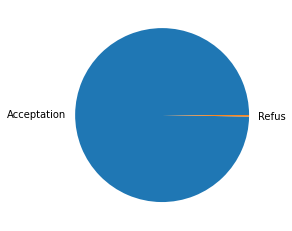

In [15]:
# Informations "FlAgImpAye"
print(pd.crosstab(data1.FlAgImpAye, "Nombre"))

plt.pie([2225112,6257], labels = ['Acceptation', 'Refus'], normalize = True)
#tips.plot.scatter("total_bill", "tip")

col_0         Nombre
CodeDecision        
0             612864
2               3346
3                633


<AxesSubplot:xlabel='CodeDecision'>

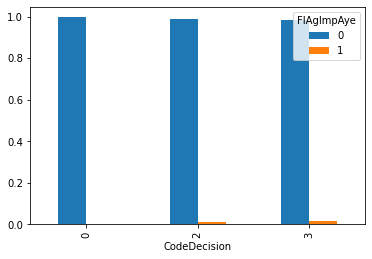

In [16]:
# Croisement "CodeDecision" et "FlAgImpAye"
print(pd.crosstab(data1.CodeDecision, "Nombre")) # Majorité de code 0 
t=pd.crosstab(data1.CodeDecision, data1.FlAgImpAye, normalize = "index") 
t.plot.bar()

In [17]:
# Coefficient de correlation de la variable cible par rapport a toutes les autres variables
for i in col:
    
    r = np.corrcoef(data1["FlAgImpAye"], data1[i])
    print(i)
    print(r)

IDAvisAutorisAtionCheque
[[1.         0.00486612]
 [0.00486612 1.        ]]
MontAnt
[[1.         0.02448052]
 [0.02448052 1.        ]]
CodeDecision
[[1.        0.0145321]
 [0.0145321 1.       ]]
VerifiAnceCPT1
[[1.       0.018717]
 [0.018717 1.      ]]
VerifiAnceCPT2
[[1.         0.02850815]
 [0.02850815 1.        ]]
VerifiAnceCPT3
[[1.         0.03900128]
 [0.03900128 1.        ]]
D2CB
[[ 1.         -0.03104191]
 [-0.03104191  1.        ]]
ScoringFP1
[[1.         0.01735367]
 [0.01735367 1.        ]]
ScoringFP2
[[ 1.        -0.0423615]
 [-0.0423615  1.       ]]
ScoringFP3
[[1.         0.03350663]
 [0.03350663 1.        ]]
TAuxImpNb_RB
[[1.         0.00713223]
 [0.00713223 1.        ]]
TAuxImpNB_CPM
[[1.         0.01190483]
 [0.01190483 1.        ]]
EcArtNumCheq
[[ 1.00000000e+00 -1.02582874e-04]
 [-1.02582874e-04  1.00000000e+00]]
NbrMAgAsin3J
[[1.         0.03032499]
 [0.03032499 1.        ]]
DiffDAteTr1
[[ 1.         -0.02650506]
 [-0.02650506  1.        ]]
DiffDAteTr2
[[ 1.        

PCA(svd_solver='full')
[3.73277852e+00 3.29625469e+00 1.71646636e+00 1.38151340e+00
 1.18603493e+00 1.05340758e+00 1.00020338e+00 9.91998474e-01
 9.86348710e-01 9.68298022e-01 9.02831457e-01 8.70636453e-01
 7.67953689e-01 6.56028346e-01 4.99472210e-01 4.17578831e-01
 2.94583625e-01 1.31246616e-01 1.04847842e-01 4.15168638e-02
 4.02339014e-31]
[1.77751358e-01 1.56964509e-01 8.17364936e-02 6.57863522e-02
 5.64778540e-02 5.01622658e-02 4.76287325e-02 4.72380226e-02
 4.69689862e-02 4.61094296e-02 4.29919741e-02 4.14588787e-02
 3.65692233e-02 3.12394451e-02 2.37843910e-02 1.98847062e-02
 1.40277917e-02 6.24983885e-03 4.99275440e-03 1.97699352e-03
 1.91590007e-32]


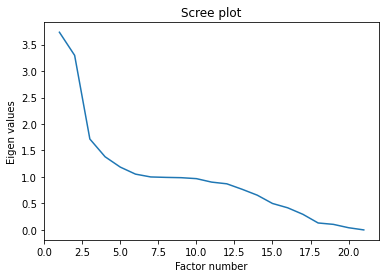

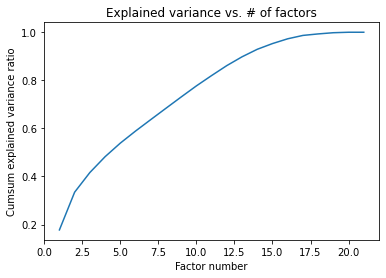

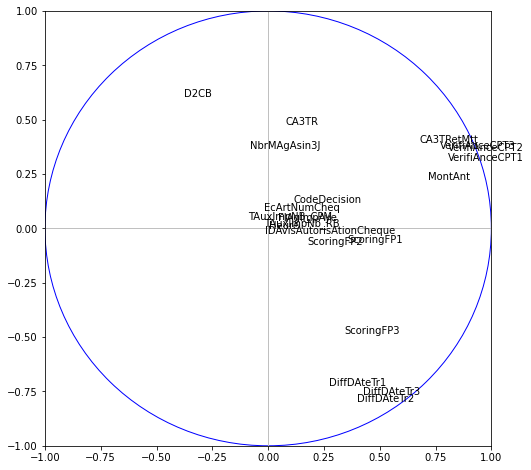

In [18]:
### ACP et analyse des résultats

X=data1

del X['ZIBZIN']


#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]


#scikit-learn
import sklearn


#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation
Z = sc.fit_transform(X)


#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
#print(acp.n_components_)

#variance expliquée
#print(acp.explained_variance_)

#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
#print(eigval)

#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)

import numpy

#importation librairie graphique
import matplotlib.pyplot as plt

#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

sqrt_eigval = numpy.sqrt(eigval)


corvar = numpy.zeros((p,p))

for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs    
#print(corvar)

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [19]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

#vérification de la théorie
print(numpy.sum(cos2var,axis=1))

#contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

#ici, on peut vérifier
print(numpy.sum(ctrvar,axis=0))

                          id    COS2_1        COS2_2
0   IDAvisAutorisAtionCheque  0.000217  5.770545e-04
1                    MontAnt  0.515122  5.105897e-02
2               CodeDecision  0.013152  1.361520e-02
3             VerifiAnceCPT1  0.649639  9.617675e-02
4             VerifiAnceCPT2  0.651460  1.275997e-01
5             VerifiAnceCPT3  0.592409  1.357123e-01
6                       D2CB  0.143004  3.650457e-01
7                 ScoringFP1  0.124821  4.454349e-03
8                 ScoringFP2  0.031163  6.005327e-03
9                 ScoringFP3  0.115578  2.347395e-01
10              TAuxImpNb_RB  0.000291  1.707628e-04
11             TAuxImpNB_CPM  0.007720  1.931622e-03
12              EcArtNumCheq  0.000310  6.836989e-03
13              NbrMAgAsin3J  0.006742  1.333758e-01
14               DiffDAteTr1  0.073587  5.206342e-01
15               DiffDAteTr2  0.158526  6.346670e-01
16               DiffDAteTr3  0.179734  5.826113e-01
17                CA3TRetMtt  0.461470  1.5447

In [20]:
data = df.iloc[:, 2:20] #all except heure, ZIB & ID
#len(data.columns)
X = data #feature, we take them all for a 1st analysis. 
y = df.iloc[:, 21] #target
X.head()

,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR
DAteTrAnsAction,,,,,,,,,,,,,,,,,,
2016-03-21 07:47:38,40.17,0,1,1,1,535,0.0,0.0,0.0,53.937433,21.834061,0,1,4.0,4.0,4.0,40.17,0.0
2016-03-21 08:04:57,20.00,0,0,0,0,358,0.0,0.0,0.0,44.742729,12.586532,0,1,4.0,4.0,4.0,20.00,0.0
2016-03-21 08:06:45,35.00,0,0,0,0,199,0.0,0.0,0.0,17.094017,39.274924,0,1,4.0,4.0,4.0,35.00,0.0
2016-03-21 08:11:38,20.00,0,0,0,0,38,0.0,0.0,0.0,41.878552,39.274924,0,1,4.0,4.0,4.0,20.00,0.0
2016-03-21 08:17:11,20.00,0,0,0,0,26,0.0,0.0,0.0,17.094017,39.274924,0,1,4.0,4.0,4.0,20.00,0.0


In [594]:
trainset =  X['2016-05-20':'2016-09-19'] #on 4 months #pca1['2016-03-21':'2016-09-19']
testset = X['2016-09-20':'2016-10-19']
X_train, X_test, y_train, y_test = trainset, testset, y['2016-05-20':'2016-09-19'], y['2016-09-20':'2016-10-19']
val = y_train.value_counts()
n = len(y_train)
y_test.value_counts()

0    263288
1       855
Name: FlAgImpAye, dtype: int64

In [8]:
weight = {1:n/(2*val[1]), 0:n/(2*val[0])} #D'apres la presentation, 0.6% de fraude
weight

{1: 163.61909814323607, 0: 0.5015326225000366}

In [16]:
scorer = make_scorer(f1_score) #Type de score
Classifier = DecisionTreeClassifier( class_weight='balanced', random_state=0) #Intaciation du modèle
params = {"criterion":["gini", "entropy"]} #Paramètres à tester
clf = GridSearchCV(Classifier, param_grid=params, cv=5, n_jobs=-1,scoring=scorer) #DONE consider auc_roc
clf.fit(X_train, y_train) #On applique sur les données d'apprentissage

In [29]:
print(clf.best_params_)#Meilleur paramètrage
print(clf.best_score_)#Meilleur score
best = clf.best_estimator_

{'criterion': 'entropy'}
0.960356098453483


In [119]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print("f1",f1_score(y_test,pred))
print("precision",precision_score(y_test,pred))
print('recall',recall_score(y_test,pred))
print(classification_report(y_test,pred))

[[262539    749]
 [   819     36]]
f1 0.04390243902439024
precision 0.045859872611464965
recall 0.042105263157894736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.05      0.04      0.04       855

    accuracy                           0.99    264143
   macro avg       0.52      0.52      0.52    264143
weighted avg       0.99      0.99      0.99    264143



In [29]:
N, train_score, val_score = learning_curve(best, X_train, pd.Series(y_train), train_sizes = np.linspace(0.2,1.0,5),cv=5, scoring=scorer, n_jobs=-1)

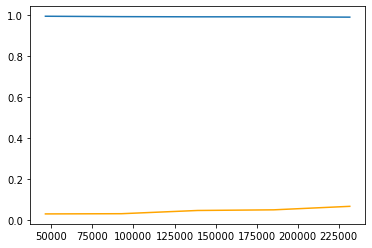

In [30]:
fig = plt.figure()
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1), color='orange')

---
On constate que l'on est en overfitting. Une stratégie de bagging semble donc adaptée.

Qu'en est-il des variables du modèle ?

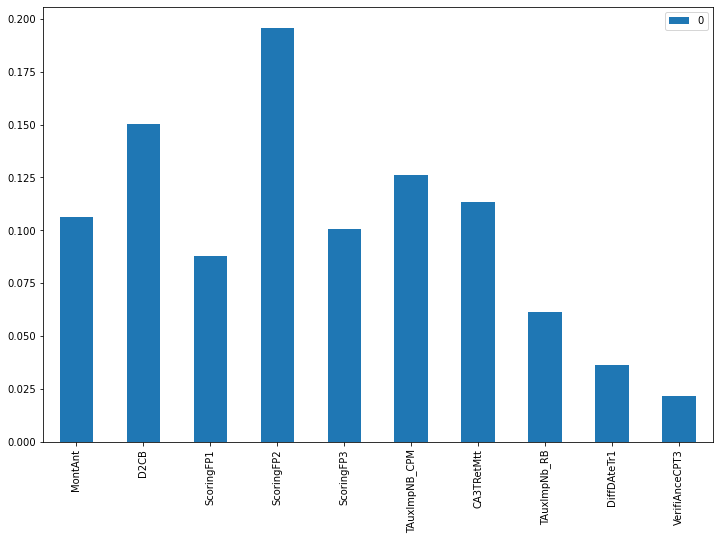

In [120]:
pd.DataFrame(best.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

----
## Feature engineering

D'après le graphique ci-dessus, il y a au plus 9 variables qui sortent du lot.



In [79]:
ColImp = pd.DataFrame((data['TAuxImpNb_RB']+ data['TAuxImpNB_CPM'])/2, columns=['TauxImp']) #TAuxImpNb_RB seul est moyen
CA4 = pd.DataFrame((data['CA3TRetMtt'] + data['CA3TR'] + data['MontAnt']), columns=['CA4']) #on accorde un poids doublé aux 4 dernieres transactions (dont celle en cours)
Scoring = pd.DataFrame(data['ScoringFP1']+ data['ScoringFP2']+ data['ScoringFP3'], columns=['ScoringFP']) # tenté, mais perte d'info a priori

#Les var principales d'apres le barplot:
pca0 = data[['MontAnt','D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3', 'TAuxImpNB_CPM', 'CA3TRetMtt', 'TAuxImpNb_RB', 'DiffDAteTr1']] #entre 7 et 9 var principales, NOPE: VerifiAnceCPT3
pca1 = pd.concat([data[['MontAnt','D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3', 'CA3TRetMtt', 'DiffDAteTr1']], ColImp], axis=1) #7 best var, merged: 'TAuxImpNb_RB'
pca2 = pd.concat([data[['MontAnt','D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3']], ColImp, CA4], axis=1)
pca3 = pd.concat([data[['MontAnt','D2CB']], ColImp, CA4, Scoring], axis=1) #

#pca1=pca2

In [653]:
X=data # essai sur pca 0 a 3 fait. data semble etre le jeu donnant les meilleurs performances
trainset =  X['2016-05-20':'2016-09-19'] #on 2 weeks #pca1['2016-03-21':'2016-09-19']
testset = X['2016-09-20':'2016-10-19']
X_train, X_test, y_train, y_test = trainset, testset, y['2016-05-20':'2016-09-19'], y['2016-09-20':'2016-10-19']

In [17]:
clf.fit(X_train, y_train) #On applique sur les données d'apprentissage
pred = clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[262503    785]
 [   834     21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.03      0.02      0.03       855

    accuracy                           0.99    264143
   macro avg       0.51      0.51      0.51    264143
weighted avg       0.99      0.99      0.99    264143



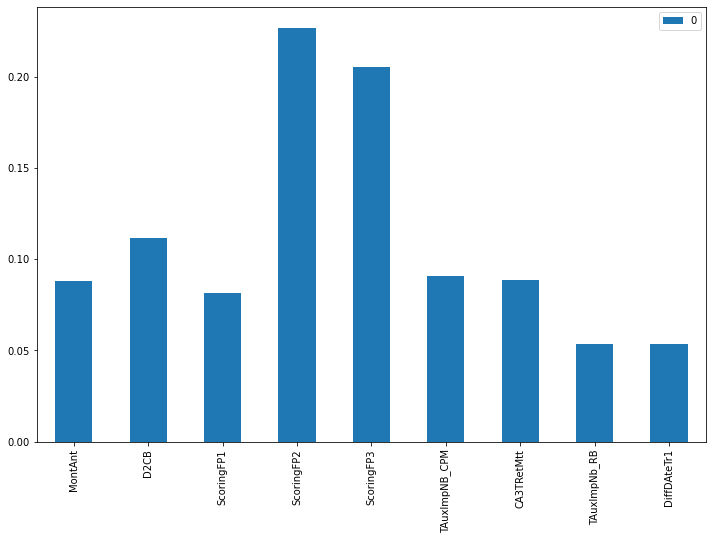

In [19]:
pd.DataFrame(clf.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

---
## Oversampling
Le jeu de données étant déséquilibré, nous allons dans un premier temps utiliser la méthode SMOTE pour créer des observations supplémentaires de la classe minoritaire.

In [654]:
#Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
#oversampling rn
sm1 = SMOTE(random_state=2, sampling_strategy= 0.42, n_jobs=-1) #sampling_strategy a definir par tatonnement
X_train_res, y_train_res = sm1.fit_sample(X_train, y_train.ravel())
X_train_res, y_train_res = shuffle(X_train_res, y_train_res, random_state=2) #otherwise learning curves have no 1 in samples
pd.Series(y_train_res).value_counts()

0    1315109
1     552345
dtype: int64

In [27]:
clf.fit(X_train_res, y_train_res) #On applique sur les données d'apprentissage oversampled
pred = clf.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[259824   3464]
 [   762     93]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    263288
           1       0.03      0.11      0.04       855

    accuracy                           0.98    264143
   macro avg       0.51      0.55      0.52    264143
weighted avg       0.99      0.98      0.99    264143



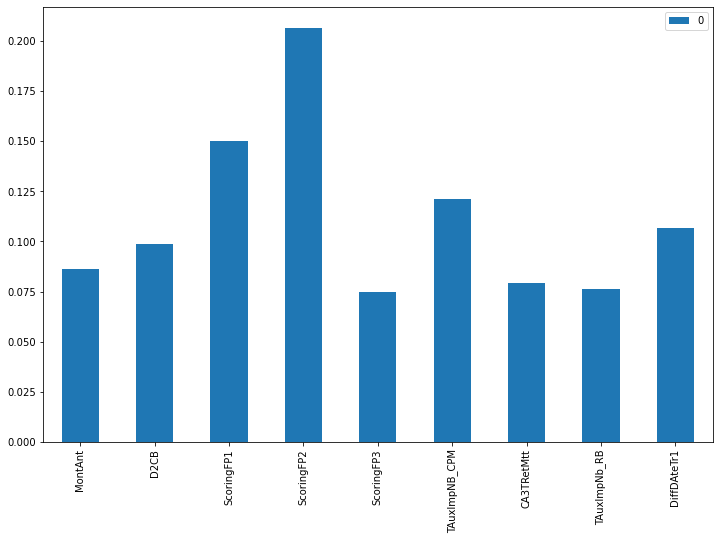

In [644]:
pd.DataFrame(clf.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import clone

In [34]:
#polynomial feature de degré 2 et 3 tenté mais moins performant que degré 1
preprocessor = make_pipeline(PolynomialFeatures(1, include_bias=False), SelectKBest(f_classif, k='all')) 

In [413]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0, n_jobs=-1))
GradBoost = make_pipeline(preprocessor, StandardScaler(), GradientBoostingClassifier( n_estimators=400,random_state=0)) #init=best
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
#SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
#KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier(n_jobs= -1))

dict_of_models = {'RandomForest': RandomForest,
                  'GradBoost': GradBoost,
                  'AdaBoost' : AdaBoost,
                  #'SVM': SVM,
                  #'KNN': KNN
                 }

In [414]:
def eval_over(model):
    
    model.fit(X_train_res, y_train_res)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    return ypred

In [415]:
import warnings
warnings.filterwarnings(action='once') #does not hide
for name, model in dict_of_models.items():
    print(name)
    eval_over(model)

RandomForest
[[262472    816]
 [   795     60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.07      0.07      0.07       855

    accuracy                           0.99    264143
   macro avg       0.53      0.53      0.53    264143
weighted avg       0.99      0.99      0.99    264143

GradBoost
[[260213   3075]
 [   701    154]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    263288
           1       0.05      0.18      0.08       855

    accuracy                           0.99    264143
   macro avg       0.52      0.58      0.53    264143
weighted avg       0.99      0.99      0.99    264143

AdaBoost
[[245076  18212]
 [   509    346]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    263288
           1       0.02      0.40      0.04       855

    accuracy                           0.93  

---
### Choix du modèle
Parmi les différents modèles essayés, le RandomForest et le GradientBoosting semble être les plus prometteurs. Nous allons nous concentrer sur ces 2 modèles dans la suite.

In [ ]:
predGrad = GradBoost.predict(X_test)
predRdmF = RandomForest.predict(X_test)
predAda = AdaBoost.predict(X_test)

### Optimisation de RandomForest :
Avec un GridSearchCV

In [285]:
#Grid on RdmF
param_forest = {
    'n_estimators'      : [300],
    #'max_depth'         : [25, 35], #None seems better
    'max_features': ['auto', len(X_train_res.columns)],
    'criterion' :['gini','entropy']
}

In [286]:
#scorer = make_scorer(f1_score) #Type de score
#Classifier = RandomForestClassifier(random_state=0, n_jobs=-1) #Intaciation du modèle
#params = param_forest #Paramètres à tester
#rfcv = GridSearchCV(Classifier, param_grid=params, n_jobs=-1,scoring=scorer) #DONE consider auc_roc
#rfcv.fit(X_train_res, y_train_res) #On applique sur les données d'apprentissage oversampled

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 9], 'n_estimators': [300]},
             scoring=make_scorer(f1_score))

---
Le meilleur paramétrage semble être celui ci dessous :
$criterion = entropy,  max\_features= auto,  n\_estimators= 300,  max\_depth=None$

Nous utiliserons cette configuration pour les prédictions à venir

In [655]:
best_rf = RandomForestClassifier(criterion = 'entropy', max_features= 'auto', n_estimators= 300, random_state=0, n_jobs=-1) #Intaciation du modèle

In [418]:
#print(rfcv.best_params_)#Meilleur paramètrage
## crit = gini, depth = 15, feature=8 estimators = 300
## 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'n_estimators': 300
#print(rfcv.best_score_)#Meilleur score
#best_rf = rfcv.best_estimator_

In [658]:
best_rf.fit(X_train_res, y_train_res)
pred_rf = best_rf.predict(X_test)

In [812]:
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[262682    606]
 [   779     76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.11      0.09      0.10       855

    accuracy                           0.99    264143
   macro avg       0.55      0.54      0.55    264143
weighted avg       0.99      0.99      0.99    264143



---
### Optimisation du GradientBoosting 
Avec les P/R curves

In [ ]:
boo = clone(GradBoost)#GradientBoostingClassifier( n_estimators=400) #init = best or RandomForest 

In [ ]:
eval_over(boo)
predg = boo.predict(X_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, boo.decision_function(X_test))

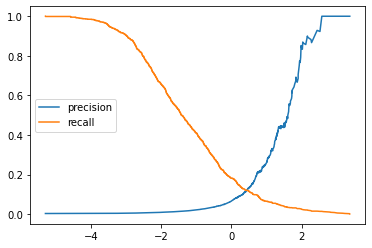

In [827]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

def find_threshold():
    fmes =[] #la moyenne harmonique de P et R
    for i in range(len(threshold)):
        prod = 2*recall[i]*precision[i]
        somme = recall[i]+precision[i]
        if prod ==0:
            fmes += [0]
        else:
            fmes += [prod/somme]
    indice = fmes.index(max(fmes))
    print(fmes[indice])
    seuil = threshold[indice-1]
    return seuil

In [828]:
seuil = find_threshold()
print(seuil)
y_pred_fin = model_final(boo, X_test, threshold=seuil)#-0.0002) # trouver seuil avec graph/ seuil de la fct find_threshold()

0.13225806451612904
0.7490744188502365


In [829]:
mat = confusion_matrix(y_test, y_pred_fin)
print(mat)
print(f1_score(y_test, y_pred_fin))
print(classification_report(y_test, y_pred_fin))

[[262985    303]
 [   773     82]]
0.13225806451612904
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.21      0.10      0.13       855

    accuracy                           1.00    264143
   macro avg       0.61      0.55      0.57    264143
weighted avg       0.99      1.00      1.00    264143



---
## Bagging
### Hard voting strategy

In [830]:
#Bagging, hard voting with predictions
pred_comb = pd.Series((y_pred_fin + pred_rf)//2)
#pred_comb.value_counts()
print(confusion_matrix(y_test, pred_comb))
print(classification_report(y_test, pred_comb))

[[263228     60]
 [   802     53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.47      0.06      0.11       855

    accuracy                           1.00    264143
   macro avg       0.73      0.53      0.55    264143
weighted avg       1.00      1.00      1.00    264143



### Soft voting strategy
Using probabilities predictions

In [422]:
from sklearn.ensemble import VotingClassifier

In [423]:
#Bagging, soft voting with models (can be long to compute)

#vote = VotingClassifier(estimators= [ ('gra', boo) , ('rfcv', best_rf)], voting='soft', n_jobs=-1)

In [880]:
#predVote = eval_over(vote) #f1 = 0.09

In [831]:
proba = boo.predict_proba(X_test) + best_rf.predict_proba(X_test) #+RandomForest.predict_proba(X_test)

In [832]:
#input: somme des probas d'appartenance a une classe (0 ou 1) de differents modeles
def proba_pred(proba):
    by_proba = []  #is empirically equivalent to predVote
    class0 = proba[:,0]
    class1 = proba[:,1]
    for i in range(len(proba)):
        if  class0[i]>class1[i]:
            by_proba += [0]
        else :
            by_proba += [1]
    return by_proba


In [833]:
by_proba = proba_pred(proba)
pd.Series(by_proba).value_counts()

0    263586
1       557
dtype: int64

In [873]:
#On a les memes reultat qu'avec le VotingClassifier. 
#L'interet ici est le temps de calcul puisque on ne 're-fit' pas les modeles sur les donnees d'entrainement
print(confusion_matrix(y_test, by_proba))
print("f1:", f1_score(y_test, by_proba))
print(classification_report(y_test, by_proba))

[[262826    462]
 [   760     95]]
f1: 0.13456090651558072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.17      0.11      0.13       855

    accuracy                           1.00    264143
   macro avg       0.58      0.55      0.57    264143
weighted avg       0.99      1.00      0.99    264143



In [811]:
pred_both = pd.Series((pred_comb + by_proba)//2)
#pred_comb.value_counts()
print(confusion_matrix(y_test, pred_both))
print(classification_report(y_test, pred_both))
#f1=0.08, FP = 2113, TP = 131

[[263228     60]
 [   802     53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.47      0.06      0.11       855

    accuracy                           1.00    264143
   macro avg       0.73      0.53      0.55    264143
weighted avg       1.00      1.00      1.00    264143



---
## Undersampling
Nous allons maintenant utiliser la méthode Tomek afin de retirer des observations de la classe majoritaire qui sont les plus proches de la classe minoritaire (au sens des plus proches voisins).
Après expérience, les résultats obtenus sur l'undersampling seul sont moins bons que ceux obtenus avec la méthode SMOTE. L'idée ici est donc de combiner ces 2 methodes :

Dans un premier temps, un Tomek pour retirer les éventuelles observations pouvant perturber l'apprentissage.

Puis un SMOTE permettant, lors de l'apprentissage, de reconnaître la classe minoritaire

In [1]:
from imblearn.under_sampling import TomekLinks 
tmk = TomekLinks()
X_res, y_res = tmk.fit_sample(X_train, y_train)
pd.Series(y_res).value_counts()

In [815]:
#nombre d'observations retirees
removed = [y_train.value_counts()[0]-pd.Series(y_res).value_counts()[0]]

In [816]:
#On applique le Tomek 5 fois de plus
#for k in range(5):
#    bef = pd.Series(y_res).value_counts()[0]
#    X_res, y_res = tmk.fit_sample(X_res, y_res)
#    aft = pd.Series(y_res).value_counts()[0]
#    removed = removed + [bef-aft]

In [817]:
print(removed) # apres la boucle commentee : [1838, 644, 178, 41, 11, 0]
#empiriquement, on constate que le nombre d'observations retirees tend vers 0 a chaque nouvelle iteration du Tomek.

[1719]


Nous avons constaté qu'appliquer plusieurs fois le Tomek diminuait les performances de classification (tests efféctués sur un jeu de données plus petit).

De plus, en iterant 5 fois l'algorithme on retire tous les plus proches voisins (cf. le commentaire ci-dessus du tableau "removed").

In [818]:
#Over+Under-sampling
sm2 = SMOTE(random_state=2, sampling_strategy= 0.4, n_jobs=-1)
X_sam, y_sam = sm2.fit_sample(X_res, y_res.ravel())
X_sam, y_sam = shuffle(X_sam, y_sam, random_state=2) #otherwise learning curves have no 1 in samples
pd.Series(y_sam).value_counts()

0    1313390
1     525356
dtype: int64

In [819]:
best_rf2 = clone(best_rf)
best_rf2.fit(X_sam, y_sam)

RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=0)

In [820]:
pred_rf2 = best_rf2.predict(X_test)

In [821]:
#Un Tomek: on itere 1 fois l'algorithme pour retirer les plus proches voisins
print(confusion_matrix(y_test, pred_rf2))
print(classification_report(y_test, pred_rf2))
#plusieurs Tomek (moins bon): en iterant 5 fois l'algorithme on retire tous les plus proches voisins.

[[262696    592]
 [   780     75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.11      0.09      0.10       855

    accuracy                           0.99    264143
   macro avg       0.55      0.54      0.55    264143
weighted avg       0.99      0.99      0.99    264143



In [822]:
#Rappel: pour comparer
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[262682    606]
 [   779     76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.11      0.09      0.10       855

    accuracy                           0.99    264143
   macro avg       0.55      0.54      0.55    264143
weighted avg       0.99      0.99      0.99    264143



In [823]:
def eval_sam(model):
    mod = clone(model)
    mod.fit(X_sam, y_sam)
    ypred = mod.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    return mod

def eval_all(dict_of_models):
    mod_clone = []
    for name, model in dict_of_models.items():
        print(name)
        mod = eval_sam(model)
        mod_clone += [mod]
    return mod_clone

In [ ]:
#mod_clone = eval_all(dict_of_models)

In [ ]:
GradBoost2 = clone(boo)

In [826]:
GradBoost2.fit(X_sam, y_sam)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=1,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k='all'))])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=400, random_state=0))])

In [835]:
predGrad2 = GradBoost2.predict(X_test)

In [836]:
print(confusion_matrix(y_test, predGrad2))
print(classification_report(y_test, predGrad2))

[[261258   2030]
 [   706    149]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    263288
           1       0.07      0.17      0.10       855

    accuracy                           0.99    264143
   macro avg       0.53      0.58      0.55    264143
weighted avg       0.99      0.99      0.99    264143



### P/R curves 
Pour le gradient sur le nouveau jeu de données Under- puis Over-sampled

In [837]:
precision, recall, threshold = precision_recall_curve(y_test, GradBoost2.decision_function(X_test))

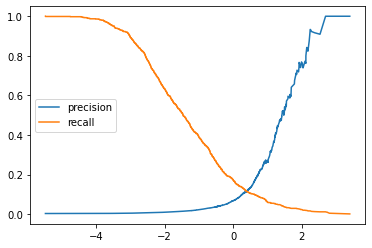

In [838]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [839]:
seuil = find_threshold()
print(seuil)
y_pred_fin2 = model_final(GradBoost2, X_test, threshold=seuil)

0.126883425852498
0.7084805457829286


In [840]:
mat = confusion_matrix(y_test, y_pred_fin2)
print(mat)
print(f1_score(y_test, y_pred_fin2))
print(classification_report(y_test, y_pred_fin2))

[[262962    326]
 [   775     80]]
0.126883425852498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.20      0.09      0.13       855

    accuracy                           1.00    264143
   macro avg       0.60      0.55      0.56    264143
weighted avg       0.99      1.00      1.00    264143



### Hard voting
Pour les 2 modèles considérés sur l'ensemble d'apprentissage Under- puis Over-sampled

In [918]:
#Bagging, hard voting with predictions
pred_comb2 = pd.Series((y_pred_fin2 + pred_rf2)//2)
#pred_comb.value_counts()
print(confusion_matrix(y_test, pred_comb2))
print(classification_report(y_test, pred_comb2))

[[263223     65]
 [   806     49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.43      0.06      0.10       855

    accuracy                           1.00    264143
   macro avg       0.71      0.53      0.55    264143
weighted avg       1.00      1.00      1.00    264143



## Soft voting strategy 
Parmi les 4 modèles.
On a créé, avec le nouveau jeu de données Under- puis Over-sampled, 2 modèles.
On cherche une combinaison de 3 modèles maximisant la F-mesure. Par tâtonnement, la voici

In [902]:
proba2 = GradBoost2.predict_proba(X_test) + best_rf.predict_proba(X_test) + boo.predict_proba(X_test)

In [903]:
by_proba2 = proba_pred(proba2)
pd.Series(by_proba2).value_counts()

0    263409
1       734
dtype: int64

In [904]:
print(confusion_matrix(y_test, by_proba2))
print("f1:", f1_score(y_test, by_proba2))
print(classification_report(y_test, by_proba2))

[[262670    618]
 [   739    116]]
f1: 0.14600377595972308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.16      0.14      0.15       855

    accuracy                           0.99    264143
   macro avg       0.58      0.57      0.57    264143
weighted avg       0.99      0.99      0.99    264143



---
## Approximation d'un noyau radial
Enfin, nous avons essayé d'utiliser une méthode d'approximation de noyau, mais cette dernière n'est pas concluante

In [845]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
rbf_feature = RBFSampler(gamma=1, n_components = 30, random_state=1)
tmp = pd.concat([X_train_res, X_test])
X_features = rbf_feature.fit_transform(tmp)
X_feat, X_rbf = X_features[0:len(X_train_res)], X_features[len(X_train_res):len(X_features)]
SGD = SGDClassifier(max_iter=50)
SGD.fit(X_feat, y_train_res)

SGDClassifier(max_iter=50)

In [846]:
predSGD = SGD.predict(X_rbf)

In [847]:
#Approximation d'un noyau radial par RBFSampler. 
#Avec un SGDClassifer, donne de mauvais resultat.
print(confusion_matrix(y_test,predSGD))
print(classification_report(y_test,predSGD))

[[263288      0]
 [   855      0]]


C:\Users\rdecoster\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263288
           1       0.00      0.00      0.00       855

    accuracy                           1.00    264143
   macro avg       0.50      0.50      0.50    264143
weighted avg       0.99      1.00      1.00    264143



# Bonus
On mesure le chiffre d'affaire généré. On reprend la définition issue du sujet.

In [134]:
from math import exp
def cost(m):
    return m*(1-exp(-m))

def CA(X_test, y_test, pred):
    res=0
    Montant = X_test['MontAnt']
    for m in range(len(Montant)):
        if(y_test[m]==0 and pred[m]==0): #TN
            res+=Montant[m]
        elif(y_test[m]==1 and pred[m]==0): #FN
            res-=cost(Montant[m])
        elif(y_test[m]==0 and pred[m]==1): #FP
            res+=0.8*Montant[m]
    print(res)
    return res

In [153]:
#Naivement, on accepte toutes les transactions
res_naif = CA(X_test,y_test, [0]*len(y_test))
print(res_naif)

15355812.29884943
15355812.29884943


In [920]:
#res = []
#for i in range(1,20):
#    res = res + [cost(i)]
#print(res)
#plt.plot(res)
def benef():
    res = 0
    name = ''
    Prediction = [pred_rf, pred_rf2, y_pred_fin, y_pred_fin2, pred_comb, pred_comb2, by_proba, by_proba2]
    Names = ['RandomForest', 'RandomForest avec un Tomek', 
             'GradientBoosting dont le seuil est redéfini' , "GradientBoosting avec un Tomek dont le seuil est redéfini",
             'Hard Voting de RdmForest et GradBoost', 'Hard Voting de RdmForest et GradBoost avec un Tomek'
             'Soft Voting de RdmForest et GradBoost', 'Soft Voting de RdmForest et GradBoost avec un Tomek']
    for i in range(len(Names)):
        print(Names[i])
        tmp = CA(X_test,y_test, Prediction[i])
        if tmp > res:
            res = tmp
            name = Names[i]
    print("Le meilleur modele est :", name)
    return res
#res = CA(X_test,y_test, pred_rf2)

In [867]:
res = benef()
print(res)

15355453.984849406
15355649.642849412
15359938.608849425
15359258.240849208
15361622.994849429
15356688.048849413
15357277.58284941
Le meilleur modele est : Hard Voting de RdmForest et GradBoost
15361622.994849429


In [868]:
if res > res_naif:
    print("Appliquer l'algorithme engendre du benefice. Le gain est de : {} euros.".format(round(res-res_naif, 2)))
else :
    print("Appliquer l'algorithme fait perdre du benefice. La perte est de {} euros.".format(round(res-res_naif, 2)))

Appliquer l'algorithme engendre du benefice. Le gain est de : 5810.7 euros.


In [919]:
#res = CA(X_test,y_test, pred_comb2)

15360821.536849432


# Conclusion
Parmis tous les algorithmes de machine learning que nous avons essayé, le modèle ayant la meilleure F-mesure est le GradientBoosting dont on a redéfini le seul:

In [878]:
print("F-mesure : ",f1_score(y_test, y_pred_fin))

F-mesure :  0.13225806451612904


Mais en rassemblant les predictions des probabilités d'appartenance à une classe du RandomForest (sans Tomek) et des 2 GradientBoosting (avec et sans Tomek), on obtient un meilleur résultat pour la F-mesure :

In [906]:
print("F-mesure : ",f1_score(y_test, by_proba2))

F-mesure :  0.14600377595972308


Enfin, pour maximiser le bénéfice de l'entreprise, c'est la stratégie de Hard Voting sans Tomek qui est plus performante. En effet, bien que son recall soit inférieur à la stratégie ci-dessus, sa précision est bien meilleure. Le gain sur le mois est de :

In [926]:
print(round(res-res_naif, 2), "euros")

5810.7 euros


In [4]:
print("Implemented by {} with the help of {}".format(author, collaborators))

Implemented by Remi Decoster with the help of Antoine Baudere
